In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

# 커널을 구성하다보면 에러는 아니지만, 빨간색 네모 박스 warning이 뜨는 경우가 많다. 
# 그런 보기 싫은 부분들을 제거해주겠다.
# import warnings
# warnings.filterwarnings('ignore')

# os 패키지를 통해 현재 디렉토리 위치를 변경하고, read_csv를 더 편리하게 할 수 있음
import os
os.getcwd() # 현재 디렉토리 파악
# os.chdir(r"______") # 불러오고 싶은 파일이 위치한 주소를 ___에 입력

# 다른 노트북 작성할 때도 이 셀만 떼서 사용 가능하다.
import platform                

# 웬만하면 해주는 것이 좋다
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin': #맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':#윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-v0_8-whitegrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)
    
# tqdm
from tqdm.notebook import tqdm

In [2]:
path = 'c:/reposit/data/dacon/2023 전력사용량 예측 AI 경진대회/'

## 1. 데이터 확인하기

In [11]:
# train
df_tr = pd.read_csv(path + 'train.csv')
df_tr.shape

(204000, 10)

In [12]:
df_tr.head(3)

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88


In [13]:
# test
df_te = pd.read_csv(path + 'test.csv')
df_te.shape

(16800, 7)

In [14]:
df_te.head(3)

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%)
0,1_20220825 00,1,20220825 00,23.5,0.0,2.2,72
1,1_20220825 01,1,20220825 01,23.0,0.0,0.9,72
2,1_20220825 02,1,20220825 02,22.7,0.0,1.5,75


In [15]:
df_bd = pd.read_csv(path + 'building_info.csv')
df_bd.shape

(100, 7)

In [16]:
df_bd.head(3)

,건물번호,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1,건물기타,110634.00,39570.0,-,-,-
1,2,건물기타,122233.47,99000.0,-,-,-
2,3,건물기타,171243.00,113950.0,40,-,-


## 2. 데이터 톺아보기

### 2.1 test

In [17]:
df_te.shape

(16800, 7)

In [18]:
df_te.isnull().sum().to_frame('nan_cnt')

,nan_cnt
num_date_time,0
건물번호,0
일시,0
기온(C),0
강수량(mm),0
풍속(m/s),0
습도(%),0


In [19]:
df_te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16800 entries, 0 to 16799
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num_date_time  16800 non-null  object 
 1   건물번호           16800 non-null  int64  
 2   일시             16800 non-null  object 
 3   기온(C)          16800 non-null  float64
 4   강수량(mm)        16800 non-null  float64
 5   풍속(m/s)        16800 non-null  float64
 6   습도(%)          16800 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 918.9+ KB


In [20]:
df_te.describe()

,건물번호,기온(C),강수량(mm),풍속(m/s),습도(%)
count,16800.000000,16800.000000,16800.000000,16800.000000,16800.000000
mean,50.500000,21.975232,0.266720,1.783405,77.148036
std,28.866929,2.884010,1.130288,1.041896,16.080725
min,1.000000,12.200000,0.000000,0.000000,26.000000
25%,25.750000,19.900000,0.000000,1.000000,66.750000
50%,50.500000,21.700000,0.000000,1.700000,79.000000
75%,75.250000,23.600000,0.000000,2.500000,90.000000
max,100.000000,32.300000,18.800000,7.000000,100.000000


In [21]:
# 건물번호
df_te['건물번호'].nunique()

100

In [22]:
df_te['건물번호'].value_counts()

1      168
64     168
74     168
73     168
72     168
      ... 
31     168
30     168
29     168
28     168
100    168
Name: 건물번호, Length: 100, dtype: int64

In [23]:
# 일시
df_te['일시'] = pd.to_datetime(df_te['일시'])

In [24]:
# 최소, 최대값
df_te['일시'].min(), df_te['일시'].max()

(Timestamp('2022-08-25 00:00:00'), Timestamp('2022-08-31 23:00:00'))

In [25]:
# 기온
df_te['기온(C)']

0        23.5
1        23.0
2        22.7
3        22.1
4        21.8
         ... 
16795    22.5
16796    20.7
16797    20.2
16798    20.1
16799    19.1
Name: 기온(C), Length: 16800, dtype: float64

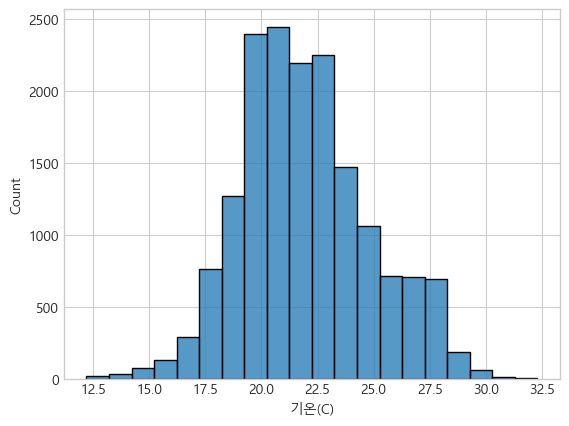

In [26]:
sns.histplot(x='기온(C)', data=df_te, bins=20)
plt.show()

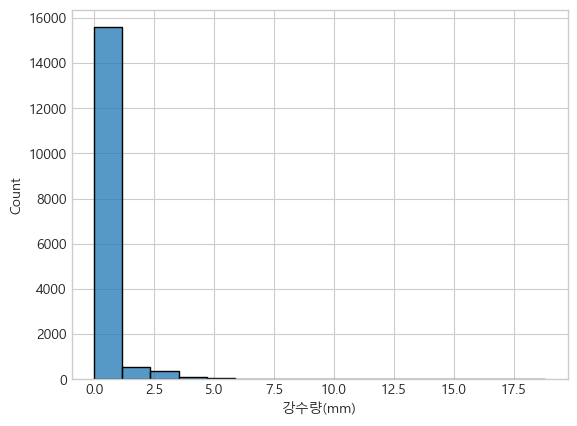

In [27]:
# 강수량
sns.histplot(x='강수량(mm)', data=df_te)
plt.show()

In [28]:
df_te.head(3)

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%)
0,1_20220825 00,1,2022-08-25 00:00:00,23.5,0.0,2.2,72
1,1_20220825 01,1,2022-08-25 01:00:00,23.0,0.0,0.9,72
2,1_20220825 02,1,2022-08-25 02:00:00,22.7,0.0,1.5,75


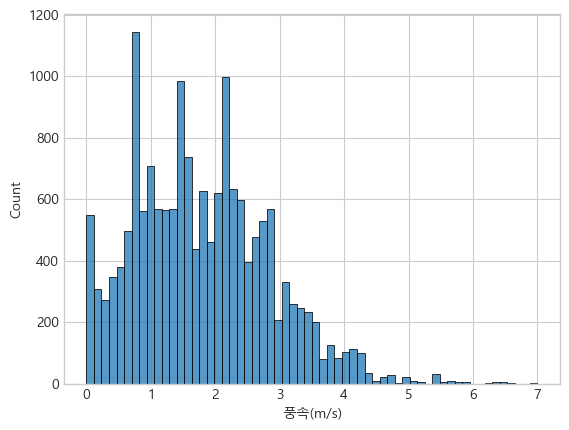

In [29]:
# 풍속
sns.histplot(x='풍속(m/s)', data=df_te)
plt.show()

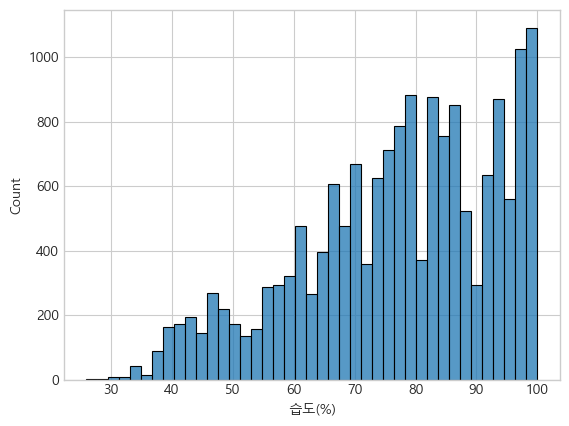

In [30]:
# 습도
sns.histplot(x='습도(%)', data=df_te)
plt.show()

### 2.2 train

In [31]:
df_tr.shape

(204000, 10)

In [32]:
# 결측치
df_tr.isnull().sum().to_frame('nan_cnt')

,nan_cnt
num_date_time,0
건물번호,0
일시,0
기온(C),0
강수량(mm),160069
풍속(m/s),19
습도(%),9
일조(hr),75182
일사(MJ/m2),87913
전력소비량(kWh),0


In [33]:
# 결측치 비율
((df_tr.isnull().sum() / len(df_tr)) * 100).to_frame('%')

,%
num_date_time,0.000000
건물번호,0.000000
일시,0.000000
기온(C),0.000000
강수량(mm),78.465196
풍속(m/s),0.009314
습도(%),0.004412
일조(hr),36.853922
일사(MJ/m2),43.094608
전력소비량(kWh),0.000000


In [34]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num_date_time  204000 non-null  object 
 1   건물번호           204000 non-null  int64  
 2   일시             204000 non-null  object 
 3   기온(C)          204000 non-null  float64
 4   강수량(mm)        43931 non-null   float64
 5   풍속(m/s)        203981 non-null  float64
 6   습도(%)          203991 non-null  float64
 7   일조(hr)         128818 non-null  float64
 8   일사(MJ/m2)      116087 non-null  float64
 9   전력소비량(kWh)     204000 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 15.6+ MB


In [35]:
df_tr.describe()

,건물번호,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
count,204000.000000,204000.000000,43931.000000,203981.000000,203991.000000,128818.000000,116087.000000,204000.000000
mean,50.500000,25.543524,2.040830,2.134031,78.716295,0.333637,1.063823,2451.036462
std,28.866141,3.779523,5.165218,1.358109,15.080108,0.401486,1.001030,2440.648858
min,1.000000,10.100000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000
25%,25.750000,23.400000,0.000000,1.200000,69.000000,0.000000,0.200000,1085.760000
50%,50.500000,25.700000,0.100000,2.000000,81.000000,0.100000,0.710000,1766.400000
75%,75.250000,28.100000,1.300000,2.800000,91.000000,0.700000,1.780000,2970.000000
max,100.000000,37.100000,92.200000,13.300000,100.000000,1.000000,3.920000,25488.400000


In [36]:
df_tr.head(3)

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88


In [37]:
# 건물번호
df_tr['건물번호'].nunique()

100

In [38]:
# 데이터 분포
df_tr['건물번호'].value_counts()

1      2040
64     2040
74     2040
73     2040
72     2040
       ... 
31     2040
30     2040
29     2040
28     2040
100    2040
Name: 건물번호, Length: 100, dtype: int64

In [39]:
2040 * 100

204000

In [40]:
# # 일시
# df_tr['날짜'] = df_tr['일시'].apply(lambda x: x.split(' ')[0]) # 날짜 컬럼 생성
# df_tr['시간'] = df_tr['일시'].apply(lambda x: x.split(' ')[1]) # 시간 컬럼 생성

# # 날짜 타입으로 변경
# df_tr['날짜'] = pd.to_datetime(df_tr['날짜'])

In [41]:
# # 날짜 최소값, 최대값
# df_tr['날짜'].min(), df_tr['날짜'].max()

In [42]:
# 그냥 일시를 바꾸는 게 낫겠다
df_tr['일시'] = pd.to_datetime(df_tr['일시'])

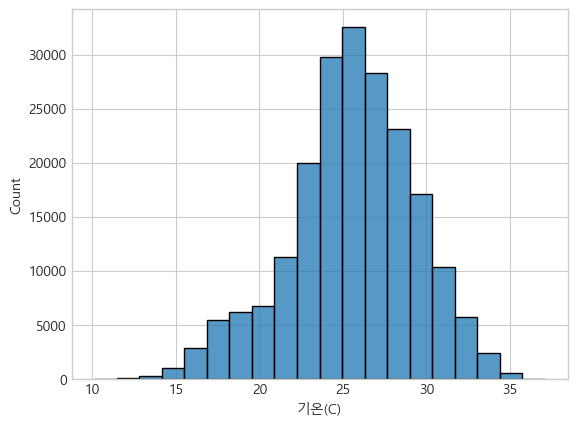

In [43]:
# 기온
sns.histplot(x='기온(C)', data=df_tr, bins=20)
plt.show()

In [45]:
df_tr.head(3)

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20220601 00,1,2022-06-01 00:00:00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1_20220601 01,1,2022-06-01 01:00:00,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1_20220601 02,1,2022-06-01 02:00:00,17.7,NaN,1.5,45.0,NaN,NaN,974.88


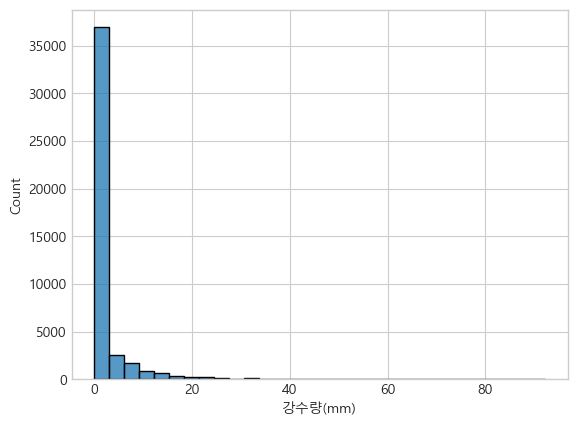

In [48]:
# 강수량
sns.histplot(x='강수량(mm)', data=df_tr, bins=30)
plt.show()

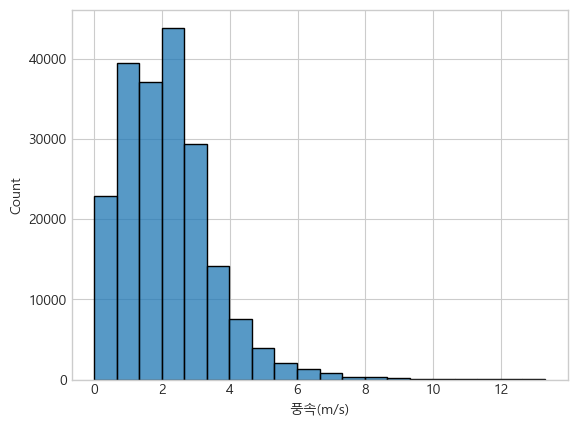

In [49]:
# 풍속
sns.histplot(x='풍속(m/s)', data=df_tr, bins=20)
plt.show()

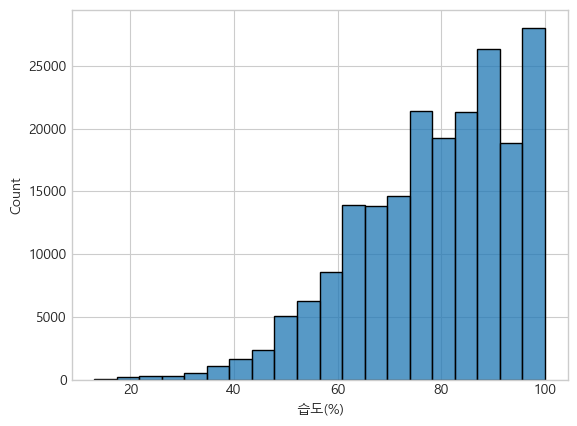

In [50]:
# 습도
sns.histplot(x='습도(%)', data=df_tr, bins=20)
plt.show()

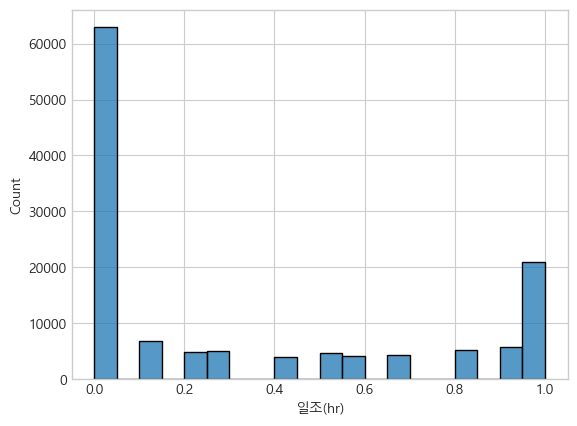

In [51]:
# 일조
sns.histplot(x='일조(hr)', data=df_tr, bins=20)
plt.show()

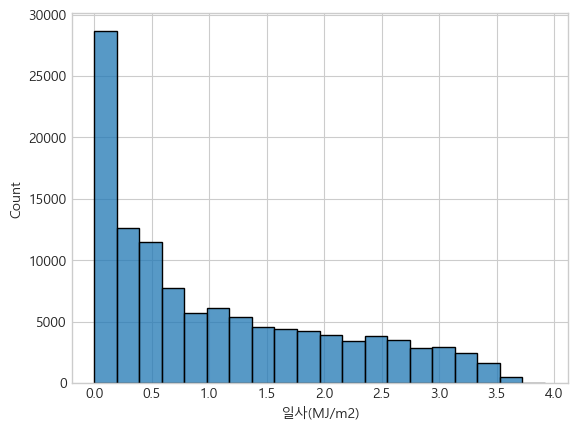

In [52]:
# 일사
sns.histplot(x='일사(MJ/m2)', data=df_tr, bins=20)
plt.show()

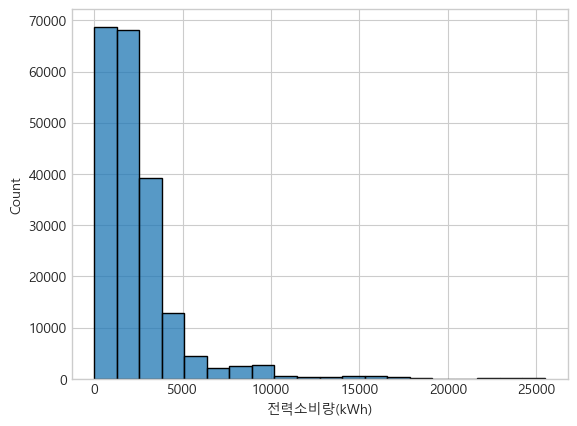

In [53]:
# 전력소비량
sns.histplot(x='전력소비량(kWh)', data=df_tr, bins=20)
plt.show()

In [54]:
df_tr.corr()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_17204\2683459252.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_tr.corr()


,건물번호,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
건물번호,1.000000,-0.004505,-0.000248,0.021483,0.022985,0.024927,0.009761,-0.180474
기온(C),-0.004505,1.000000,-0.066500,0.220203,-0.389854,0.387001,0.476193,0.171190
강수량(mm),-0.000248,-0.066500,1.000000,0.028729,0.271468,-0.098351,-0.194009,0.015386
풍속(m/s),0.021483,0.220203,0.028729,1.000000,-0.219095,0.093043,0.136162,0.109954
습도(%),0.022985,-0.389854,0.271468,-0.219095,1.000000,-0.574123,-0.600839,-0.129546
일조(hr),0.024927,0.387001,-0.098351,0.093043,-0.574123,1.000000,0.781689,0.021098
일사(MJ/m2),0.009761,0.476193,-0.194009,0.136162,-0.600839,0.781689,1.000000,0.080357
전력소비량(kWh),-0.180474,0.171190,0.015386,0.109954,-0.129546,0.021098,0.080357,1.000000


C:\Users\Playdata\AppData\Local\Temp\ipykernel_17204\2843551827.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_tr.corr(), cmap='RdYlGn', annot=True, fmt='.1f')


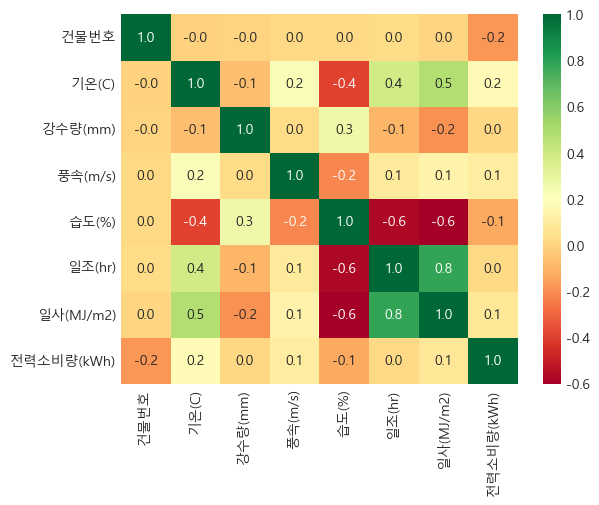

In [56]:
sns.heatmap(df_tr.corr(), cmap='RdYlGn', annot=True, fmt='.1f')
plt.show()

In [3]:
import pandas as pd

# 데이터 로드
data = pd.read_csv(path + 'train.csv')

# 처음 5행 출력
data.head()

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40


In [4]:
# 데이터의 결측치 확인
missing_data = data.isnull().sum()

# 데이터의 기본 통계량 확인
statistics = data.describe()

missing_data, statistics

(num_date_time         0
 건물번호                  0
 일시                    0
 기온(C)                 0
 강수량(mm)          160069
 풍속(m/s)              19
 습도(%)                 9
 일조(hr)            75182
 일사(MJ/m2)         87913
 전력소비량(kWh)            0
 dtype: int64,
                 건물번호          기온(C)       강수량(mm)        풍속(m/s)  \
 count  204000.000000  204000.000000  43931.000000  203981.000000   
 mean       50.500000      25.543524      2.040830       2.134031   
 std        28.866141       3.779523      5.165218       1.358109   
 min         1.000000      10.100000      0.000000       0.000000   
 25%        25.750000      23.400000      0.000000       1.200000   
 50%        50.500000      25.700000      0.100000       2.000000   
 75%        75.250000      28.100000      1.300000       2.800000   
 max       100.000000      37.100000     92.200000      13.300000   
 
                습도(%)         일조(hr)      일사(MJ/m2)     전력소비량(kWh)  
 count  203991.000000  128818.000000  11608

In [5]:
from sklearn.preprocessing import StandardScaler

# 1. 강수량(mm)의 결측치를 0으로 대체
data['강수량(mm)'].fillna(0, inplace=True)

# 2. 다른 컬럼들의 결측치를 중앙값으로 대체
for column in ['풍속(m/s)', '습도(%)', '일조(hr)', '일사(MJ/m2)']:
    median_value = data[column].median()
    data[column].fillna(median_value, inplace=True)

# 3. 일시 컬럼에서 년, 월, 일, 시간 정보 추출
data['년'] = data['일시'].str.slice(0, 4).astype(int)
data['월'] = data['일시'].str.slice(4, 6).astype(int)
data['일'] = data['일시'].str.slice(6, 8).astype(int)
data['시간'] = data['일시'].str.slice(9, 11).astype(int)

# 4. num_date_time 컬럼 제거
data.drop('num_date_time', axis=1, inplace=True)

# 5. 데이터 스케일링
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['기온(C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '일조(hr)', '일사(MJ/m2)']])
scaled_df = pd.DataFrame(scaled_features, columns=['기온(C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '일조(hr)', '일사(MJ/m2)'])
data.update(scaled_df)

# 전처리된 데이터의 처음 5행 출력
data.head()

,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh),년,월,일,시간
0,1,20220601 00,-1.837147,-0.173062,-0.908674,-2.434815,-0.436022,-0.259735,1085.28,2022,6,1,0
1,1,20220601 01,-1.995898,-0.173062,-0.761404,-2.235873,-0.436022,-0.259735,1047.36,2022,6,1,1
2,1,20220601 02,-2.075273,-0.173062,-0.466862,-2.235873,-0.436022,-0.259735,974.88,2022,6,1,2
3,1,20220601 03,-2.339857,-0.173062,-0.540497,-2.036931,-0.436022,-0.259735,953.76,2022,6,1,3
4,1,20220601 04,-1.890064,-0.173062,0.490398,-2.368501,-0.436022,-0.259735,986.40,2022,6,1,4


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# 특성과 타겟 변수 분리
X = data.drop(columns=['일시', '전력소비량(kWh)', '일조(hr)', '일사(MJ/m2)'])
y = data['전력소비량(kWh)']

# 학습용과 검증용 데이터로 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
# # 모델 초기화
# models = {
#     "Linear Regression": LinearRegression(),
#     "Random Forest": RandomForestRegressor(random_state=42),
#     "Gradient Boosting": GradientBoostingRegressor(random_state=42)
# }

# # 각 모델 학습 및 평가
# results = {}
# for model_name, model in tqdm(models.items()):
#     # 학습
#     model.fit(X_train, y_train)
    
#     # 예측
#     y_pred = model.predict(X_val)
    
#     # 성능 평가 (RMSE)
#     rmse = mean_squared_error(y_val, y_pred, squared=False)
#     results[model_name] = rmse

# # 가장 좋은 성능을 가진 모델 선택
# best_model_name = min(results, key=results.get)
# best_model_rmse = results[best_model_name]

# best_model_name, best_model_rmse



RandomForestRegressor(random_state=42)

In [25]:
# 테스트 데이터
from sklearn.preprocessing import StandardScaler

data = pd.read_csv(path + 'test.csv')

# 1. 강수량(mm)의 결측치를 0으로 대체
data['강수량(mm)'].fillna(0, inplace=True)

# 2. 다른 컬럼들의 결측치를 중앙값으로 대체
for column in ['풍속(m/s)', '습도(%)']:
    median_value = data[column].median()
    data[column].fillna(median_value, inplace=True)

# 3. 일시 컬럼에서 년, 월, 일, 시간 정보 추출
data['년'] = data['일시'].str.slice(0, 4).astype(int)
data['월'] = data['일시'].str.slice(4, 6).astype(int)
data['일'] = data['일시'].str.slice(6, 8).astype(int)
data['시간'] = data['일시'].str.slice(9, 11).astype(int)

# 4. num_date_time 컬럼 제거
data.drop('num_date_time', axis=1, inplace=True)

# 5. 데이터 스케일링
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['기온(C)', '강수량(mm)', '풍속(m/s)', '습도(%)']])
scaled_df = pd.DataFrame(scaled_features, columns=['기온(C)', '강수량(mm)', '풍속(m/s)', '습도(%)'])
data.update(scaled_df)

# 전처리된 데이터의 처음 5행 출력
data = data[['건물번호', '기온(C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '년', '월', '일', '시간']]
data.head()

,건물번호,기온(C),강수량(mm),풍속(m/s),습도(%),년,월,일,시간
0,1,0.528713,-0.235982,0.399855,-0.320147,2022,8,25,0
1,1,0.355338,-0.235982,-0.847907,-0.320147,2022,8,25,1
2,1,0.251313,-0.235982,-0.272017,-0.133582,2022,8,25,2
3,1,0.043263,-0.235982,-0.463980,0.052982,2022,8,25,3
4,1,-0.060762,-0.235982,-0.751926,-0.009206,2022,8,25,4


In [26]:
data.columns

Index(['건물번호', '기온(C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '년', '월', '일', '시간'], dtype='object')

In [31]:
pred = model.predict(data)

submission = pd.read_csv(path + 'sample_submission.csv')
submission['answer'] = pred

submission.to_csv(path + 'baseline_submission.csv', index=False)

### 분리 x

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# 특성과 타겟 변수 분리
X = data.drop(columns=['일시', '전력소비량(kWh)', '일조(hr)', '일사(MJ/m2)'])
y = data['전력소비량(kWh)']

# 학습용과 검증용 데이터로 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(random_state=42)
model.fit(X, y)
# # 모델 초기화
# models = {
#     "Linear Regression": LinearRegression(),
#     "Random Forest": RandomForestRegressor(random_state=42),
#     "Gradient Boosting": GradientBoostingRegressor(random_state=42)
# }

# # 각 모델 학습 및 평가
# results = {}
# for model_name, model in tqdm(models.items()):
#     # 학습
#     model.fit(X_train, y_train)
    
#     # 예측
#     y_pred = model.predict(X_val)
    
#     # 성능 평가 (RMSE)
#     rmse = mean_squared_error(y_val, y_pred, squared=False)
#     results[model_name] = rmse

# # 가장 좋은 성능을 가진 모델 선택
# best_model_name = min(results, key=results.get)
# best_model_rmse = results[best_model_name]

# best_model_name, best_model_rmse



RandomForestRegressor(random_state=42)

In [8]:
# 테스트 데이터
from sklearn.preprocessing import StandardScaler

data = pd.read_csv(path + 'test.csv')

# 1. 강수량(mm)의 결측치를 0으로 대체
data['강수량(mm)'].fillna(0, inplace=True)

# 2. 다른 컬럼들의 결측치를 중앙값으로 대체
for column in ['풍속(m/s)', '습도(%)']:
    median_value = data[column].median()
    data[column].fillna(median_value, inplace=True)

# 3. 일시 컬럼에서 년, 월, 일, 시간 정보 추출
data['년'] = data['일시'].str.slice(0, 4).astype(int)
data['월'] = data['일시'].str.slice(4, 6).astype(int)
data['일'] = data['일시'].str.slice(6, 8).astype(int)
data['시간'] = data['일시'].str.slice(9, 11).astype(int)

# 4. num_date_time 컬럼 제거
data.drop('num_date_time', axis=1, inplace=True)

# 5. 데이터 스케일링
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['기온(C)', '강수량(mm)', '풍속(m/s)', '습도(%)']])
scaled_df = pd.DataFrame(scaled_features, columns=['기온(C)', '강수량(mm)', '풍속(m/s)', '습도(%)'])
data.update(scaled_df)

# 전처리된 데이터의 처음 5행 출력
data = data[['건물번호', '기온(C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '년', '월', '일', '시간']]
data.head()

,건물번호,기온(C),강수량(mm),풍속(m/s),습도(%),년,월,일,시간
0,1,0.528713,-0.235982,0.399855,-0.320147,2022,8,25,0
1,1,0.355338,-0.235982,-0.847907,-0.320147,2022,8,25,1
2,1,0.251313,-0.235982,-0.272017,-0.133582,2022,8,25,2
3,1,0.043263,-0.235982,-0.463980,0.052982,2022,8,25,3
4,1,-0.060762,-0.235982,-0.751926,-0.009206,2022,8,25,4


In [9]:
pred = model.predict(data)

submission = pd.read_csv(path + 'sample_submission.csv')
submission['answer'] = pred

submission.to_csv(path + 'submission_2.csv', index=False)